In [1]:
import numpy as np

In [2]:
import torch

In [3]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 量化(随机Scale与Zero Point)
$$
r = s*(q-z) //反量化，从整型到浮点数 \\
q = int(round(r/s + z))  //量化，从浮点型到整型
$$


In [4]:
def linear_q_with_scale_and_zero_point(
    tensor, scale, zero_point, dtype = torch.int8):

    scaled_and_shifted_tensor = tensor / scale + zero_point

    rounded_tensor = torch.round(scaled_and_shifted_tensor)

    q_min = torch.iinfo(dtype).min
    q_max = torch.iinfo(dtype).max

    q_tensor = rounded_tensor.clamp(q_min,q_max).to(dtype)
    
    return q_tensor

In [5]:
test_tensor=torch.tensor(
    [[191.6, -13.5, 728.6],
     [92.14, 295.5,  -184],
     [0,     684.6, 245.5]]
)

In [6]:
### these are random values for "scale" and "zero_point"
### 给定随机的scale与 zero_point
### to test the implementation
scale = 3.5
zero_point = -70

In [7]:
quantized_tensor = linear_q_with_scale_and_zero_point(
    test_tensor, scale, zero_point)

In [8]:
quantized_tensor

tensor([[ -15,  -74,  127],
        [ -44,   14, -123],
        [ -70,  126,    0]], dtype=torch.int8)

# 反量化(随机Scale与Zero Point)

In [9]:
dequantized_tensor = scale * (quantized_tensor.float() - zero_point)

In [10]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

In [11]:
### without casting to float
scale * (quantized_tensor - zero_point)

tensor([[ 192.5000,  -14.0000, -206.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000, -210.0000,  245.0000]])

In [12]:
def linear_dequantization(quantized_tensor, scale, zero_point):
    return scale * (quantized_tensor.float() - zero_point)

In [13]:
dequantized_tensor = linear_dequantization(
    quantized_tensor, scale, zero_point)

In [14]:
dequantized_tensor

tensor([[ 192.5000,  -14.0000,  689.5000],
        [  91.0000,  294.0000, -185.5000],
        [   0.0000,  686.0000,  245.0000]])

# 量化误差

In [15]:
from helper import plot_quantization_errors

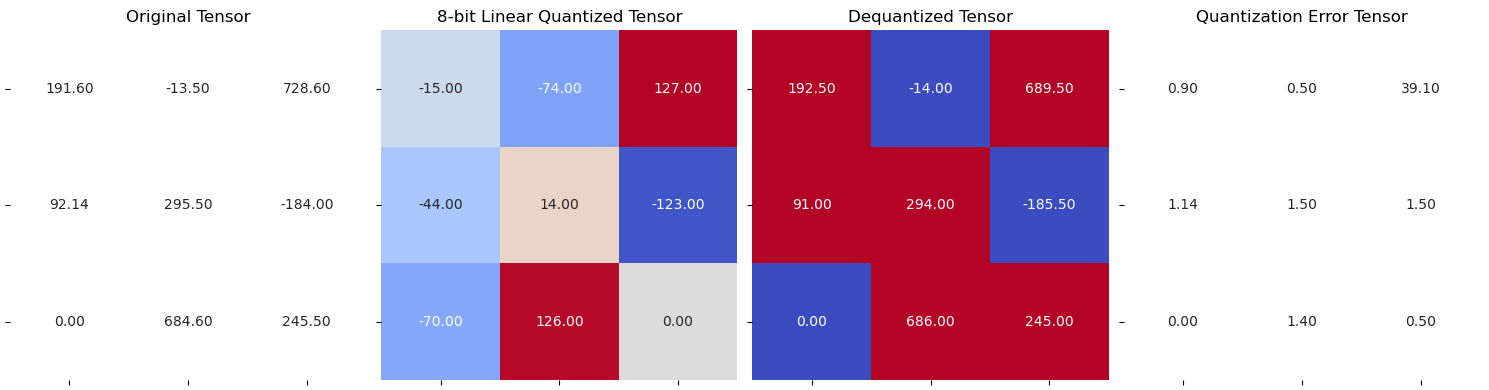

In [16]:
plot_quantization_errors(test_tensor, quantized_tensor,
                         dequantized_tensor)

In [17]:
dequantized_tensor - test_tensor

tensor([[  0.9000,  -0.5000, -39.1000],
        [ -1.1400,  -1.5000,  -1.5000],
        [  0.0000,   1.4000,  -0.5000]])

In [18]:
(dequantized_tensor - test_tensor).square()

tensor([[8.0999e-01, 2.5000e-01, 1.5288e+03],
        [1.2996e+00, 2.2500e+00, 2.2500e+00],
        [0.0000e+00, 1.9601e+00, 2.5000e-01]])

In [19]:
(dequantized_tensor - test_tensor).square().mean()

tensor(170.8753)